### Bayesian Regression Example

dataset https://www.kaggle.com/pdquant/sp500-daily-19862018

In [149]:
import numpy as np
import pandas
import matplotlib.pyplot as plt

### Show data frame

In [150]:
train_df = pandas.read_csv('spx.csv')
train_df

,date,close
0,02-Jan-86,209.59
1,03-Jan-86,210.88
2,06-Jan-86,210.65
3,07-Jan-86,213.80
4,08-Jan-86,207.97
...,...,...
8187,25-Jun-18,2717.07
8188,26-Jun-18,2723.06
8189,27-Jun-18,2699.63
8190,28-Jun-18,2716.31


### Plot close prices

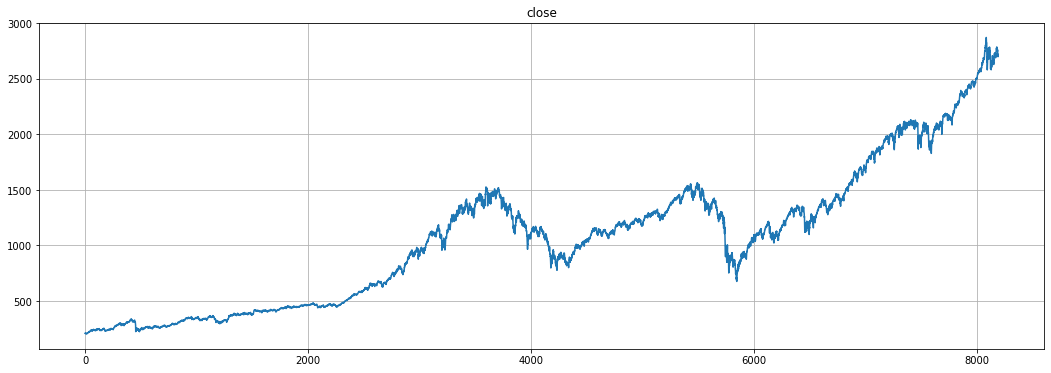

In [73]:
closes = train_df.values[:, 1].astype(np.float)
plt.figure(figsize=[18, 6])
plt.title('close')
plt.plot(closes)
plt.grid()
plt.show()

### Make dataset for training

In [151]:
prev_num = 10
test_num = 100

# Make train dataset
X_train = []
y_train = []
for i in range(len(closes)-test_num-prev_num):
    X_train.append(closes[i:i+prev_num])
    y_train.append(closes[i+prev_num])
X_train = np.stack(X_train)
y_train = np.stack(y_train)
print(X_train.shape, y_train.shape)

# Make test dataset
X_test = []
y_test = []
for i in range(len(closes)-test_num-prev_num, len(closes)-prev_num):
    X_test.append(closes[i:i+prev_num])
    y_test.append(closes[i+prev_num])
X_test = np.stack(X_test)
y_test = np.stack(y_test)
print(X_test.shape, y_test.shape)
    

(8082, 10) (8082,)
(100, 10) (100,)


### Do Bayesian Regression

In [152]:
from sklearn import linear_model

reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
y_pred_mean, y_pred_std = reg.predict(X_test, return_std=True)
print(y_pred_mean.shape, y_pred_std.shape)

(100,) (100,)


### Plot Predictions

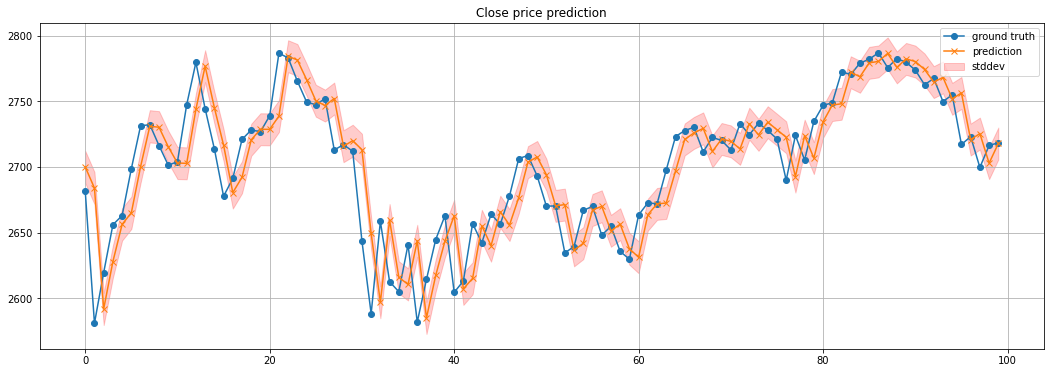

In [153]:
plt.figure(figsize=[18, 6])
plt.title('Close price prediction')
plt.plot(y_test, marker='o', label='ground truth')
plt.plot(y_pred_mean, marker='x', label='prediction')
plt.fill_between(np.arange(0, len(y_pred_mean)), 
                 y_pred_mean + y_pred_std,
                 y_pred_mean - y_pred_std, 
                 alpha=0.2, color='r', label='stddev')
plt.grid()
plt.legend()
plt.show()

### Estimation

In [145]:
in_std = []
for i in range(len(y_test)):
    if y_pred_mean[i] - y_pred_std[i] < y_test[i] < y_pred_mean[i] + y_pred_std[i]:
        in_std.append(True)
    else:
        in_std.append(False)
        
print('In Std. :', np.sum(in_std), "/", len(in_std))

In Std. : 46 / 100
